In [32]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line-wrapping

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [33]:
df_ = pd.read_csv("../data/HR_data.csv", index_col=0)
df_cont = df_.select_dtypes(include=['float64', 'int64'])
df_cat = df_.select_dtypes(include=['object', 'category', 'bool'])

In [34]:
df_ = df_.rename(columns = {
    "Frustrated" : "frustrated"
})
df_.head(5)

,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,HR_TD_Slope_mean,HR_TD_Slope,TEMP_TD_Mean,TEMP_TD_Median,TEMP_TD_std,TEMP_TD_Min,TEMP_TD_Max,TEMP_TD_AUC,TEMP_TD_Kurtosis,TEMP_TD_Skew,TEMP_TD_Slope_min,TEMP_TD_Slope_max,TEMP_TD_Slope_mean,TEMP_TD_Slope,EDA_TD_P_Mean,EDA_TD_P_Median,EDA_TD_P_std,EDA_TD_P_Min,EDA_TD_P_Max,EDA_TD_P_AUC,EDA_TD_P_Kurtosis,EDA_TD_P_Skew,EDA_TD_P_Slope_min,EDA_TD_P_Slope_max,EDA_TD_P_Slope_mean,EDA_TD_P_Slope,EDA_TD_T_Mean,EDA_TD_T_Median,EDA_TD_T_std,EDA_TD_T_Min,EDA_TD_T_Max,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT,Round,Phase,Individual,Puzzler,frustrated,Cohort,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,78.663878,76.70,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.7300,0.9775,0.044590,0.046701,31.090000,31.11,0.163895,30.59,31.31,36593.14,1.349570,-1.352915,-0.002286,0.000377,-0.000589,-0.000455,0.000172,0.000006,0.000927,-0.006185,0.007375,0.202712,28.467716,1.091696,-0.000200,0.000198,-0.000004,4.360220e-06,0.181286,0.182695,0.003744,0.169440,0.186816,213.374114,1.345997,-1.379434,-0.000144,0.000138,0.000010,1.036040e-05,11,2.522727,2.075000,round_3,phase3,1,1,2.0,D1_4,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,76.540732,76.61,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.3600,0.1900,-0.028095,-0.024148,30.937293,30.93,0.083766,30.81,31.17,38826.24,0.177872,0.898894,-0.001062,0.000714,0.000232,0.000241,0.000489,0.000035,0.001138,0.000000,0.008462,0.614382,18.455509,3.948751,-0.000273,0.000451,0.000001,-2.617585e-06,0.169909,0.169617,0.002976,0.164504,0.179273,213.235380,0.887010,0.854067,-0.000146,0.000165,0.000009,7.714503e-06,15,2.214286,2.192308,round_3,phase2,1,1,3.0,D1_4,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,78.173563,77.92,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.6300,0.3575,-0.024202,-0.026008,30.735341,30.75,0.078038,30.59,30.89,31964.72,-0.956503,-0.143041,-0.000962,0.000777,-0.000085,-0.000155,0.000155,0.000002,0.000444,0.000000,0.005550,0.161122,36.768442,5.151764,-0.000045,0.000054,-0.000001,-1.084815e-06,0.166798,0.166706,0.002266,0.162036,0.172624,173.465157,0.205817,0.480581,-0.000112,0.000132,0.000002,1.799914e-06,10,1.972222,2.111111,round_3,phase1,1,1,2.0,D1_4,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,83.073688,83.88,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.4650,0.6500,0.021375,0.021477,30.505025,30.29,0.366089,30.11,31.15,36758.35,-1.513910,0.503921,-0.000556,0.002963,0.000667,0.000704,0.000673,0.000018,0.001829,0.000000,0.012784,0.811271,19.045235,4.165664,-0.000271,0.000309,0.000002,-5.062888e-08,0.159292,0.158034,0.004789,0.148368,0.175496,191.943390,2.488339,1.246665,-0.000455,0.000481,-0.000001,-1.355151e-07,12,1.886364,1.805556,round_2,phase3,1,1,2.0,D1_4,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,72.281250,72.91,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.3725,0.3375,-0.013555,-0.012871,30.332578,30.35,0.110119,30.11,30.53,38795.38,-1.456255,-0.171929,-0.000962,0.000192,-0.000314,-0.000300,0.001164,0.000074,0.002936,-0.001992,0.022954,1.484085,20.998111,4.209074,-0.000646,0.000639,0.000005,1.344367e-05,0.150387,0.147895,0.006473,0.143003,0.168106,192.341180,1.196508,1.592099,-0.000420,0.000334,0.000014,1.267198e-05,20,1.812500,1.926471,round_2,phase2,1,1,2.0,D1_4,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0


In [35]:
for col in df_.columns:
    pass
    #print(col, df_[col].iloc[0])

metrics_cols = ["HR", "TEMP", "EDA"]
df_metrics = df_[[col for col in df_.columns if any(col.startswith(metric) for metric in metrics_cols)]]
df_metrics.shape

(312, 51)

In [36]:
scaler = StandardScaler()
df_metrics_scaled = scaler.fit_transform(df_metrics)  # numpy array

# numpy to df
df_metrics = pd.DataFrame(df_metrics_scaled, columns=df_metrics.columns, index=df_metrics.index)

In [37]:
df_metrics

,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,HR_TD_Slope_mean,HR_TD_Slope,TEMP_TD_Mean,TEMP_TD_Median,TEMP_TD_std,TEMP_TD_Min,TEMP_TD_Max,TEMP_TD_AUC,TEMP_TD_Kurtosis,TEMP_TD_Skew,TEMP_TD_Slope_min,TEMP_TD_Slope_max,TEMP_TD_Slope_mean,TEMP_TD_Slope,EDA_TD_P_Mean,EDA_TD_P_Median,EDA_TD_P_std,EDA_TD_P_Min,EDA_TD_P_Max,EDA_TD_P_AUC,EDA_TD_P_Kurtosis,EDA_TD_P_Skew,EDA_TD_P_Slope_min,EDA_TD_P_Slope_max,EDA_TD_P_Slope_mean,EDA_TD_P_Slope,EDA_TD_T_Mean,EDA_TD_T_Median,EDA_TD_T_std,EDA_TD_T_Min,EDA_TD_T_Max,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT
0,0.010023,-0.062352,0.187214,-0.163880,0.001629,-0.312526,-0.621392,-0.007322,-0.414857,0.978121,1.134450,1.172477,-1.106824,-1.091118,0.588536,-1.281401,-1.102326,-0.987670,1.709965,-2.059884,-1.876924,-0.535081,-1.974748,-1.609427,-0.398763,-0.308917,-0.634936,0.209116,-0.719943,-0.401043,1.334549,-1.325052,0.730195,-0.756957,-0.376295,-0.284402,-0.675615,-0.666940,-0.698319,-0.539044,-0.749996,-0.674626,0.276417,-1.310763,0.595726,-0.667286,0.135978,0.096659,-1.012991,1.132105,0.099199
1,-0.176801,-0.069806,-0.793634,0.111690,-0.570809,-0.086288,-0.114281,-0.045281,0.532375,-0.699948,-0.286138,-0.196215,-1.199931,-1.200689,-0.262539,-1.148024,-1.187839,-0.472585,0.590538,1.380649,-0.328322,-0.141520,0.640777,0.686065,-0.398461,-0.308888,-0.634567,0.256411,-0.719546,-0.400723,0.488961,0.680362,0.728983,-0.753550,-0.372479,-0.290415,-0.677760,-0.669370,-0.699269,-0.540199,-0.751215,-0.674647,0.136077,0.945391,0.595677,-0.666593,0.135187,0.095006,-0.689332,0.466269,0.289742
2,-0.033122,0.038688,-0.774299,0.369032,-0.544302,-0.988619,-0.336389,-0.740408,-0.158848,-0.343025,-0.210046,-0.232145,-1.323064,-1.310260,-0.323378,-1.281401,-1.358864,-2.055257,-0.493231,-0.211322,-0.201262,-0.068616,-0.369613,-0.622687,-0.398780,-0.308920,-0.635777,0.256411,-0.720610,-0.401076,2.035593,1.524777,0.732784,-0.758900,-0.374216,-0.289094,-0.678346,-0.669910,-0.700148,-0.540777,-0.752290,-0.680703,-0.072207,0.568117,0.596330,-0.667436,0.130645,0.091310,-1.093906,-0.056276,0.157854
3,0.398059,0.532294,0.163883,0.068800,0.206917,0.153083,-0.486637,-0.513035,0.263566,0.280258,0.680722,0.685178,-1.463490,-1.590276,2.736107,-1.572404,-1.200055,-0.949563,-1.025771,0.777171,0.312484,2.485134,2.024604,2.211636,-0.398285,-0.308905,-0.633365,0.256411,-0.717967,-0.400570,0.538766,0.832617,0.729019,-0.755469,-0.371769,-0.288203,-0.679761,-0.671521,-0.697025,-0.543977,-0.751826,-0.677889,0.625703,1.341971,0.589771,-0.658566,0.129049,0.090101,-0.932077,-0.241620,-0.338459
4,-0.551609,-0.376240,-0.671610,-0.410499,-0.703343,-0.311621,0.152870,-1.139046,0.500374,-0.385643,-0.001954,0.021644,-1.568633,-1.553752,0.017369,-1.572404,-1.578754,-0.479703,-0.970688,-0.255459,-0.201262,-0.751237,-1.100251,-1.098459,-0.397816,-0.308850,-0.631438,0.241176,-0.714250,-0.400047,0.703698,0.863087,0.722779,-0.751029,-0.369585,-0.276574,-0.681440,-0.673405,-0.694939,-0.545233,-0.753021,-0.677829,0.230709,1.690908,0.590443,-0.662295,0.138101,0.098103,-0.284758,-0.401070,-0.142057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.305259,0.114054,0.450528,0.102040,0.266698,0.480824,-0.798124,-0.151475,0.129161,-0.353680,-0.131435,-0.142814,-0.871885,-0.859801,-0.423608,-0.832769,-0.931301,-0.113528,-0.341938,-0.719578,0.051362,-0.530883,-0.763949,-0.602495,-0.075933,-0.244857,0.311913,0.117810,0.206074,-0.063683,-0.781949,-0.660634,0.137492,0.432669,-0.046377,-0.189925,-0.486314,-0.521262,-0.132766,-0.429145,-0.385569,-0.475616,-0.082755,1.212583,0.265128,0.013876,0.763255,0.734812,-0.122928,-0.364274,-0.541496
308,2.175582,2.250392,1.535291,-0.069521,1.865011,1.791135,-0.169872,-1.090790

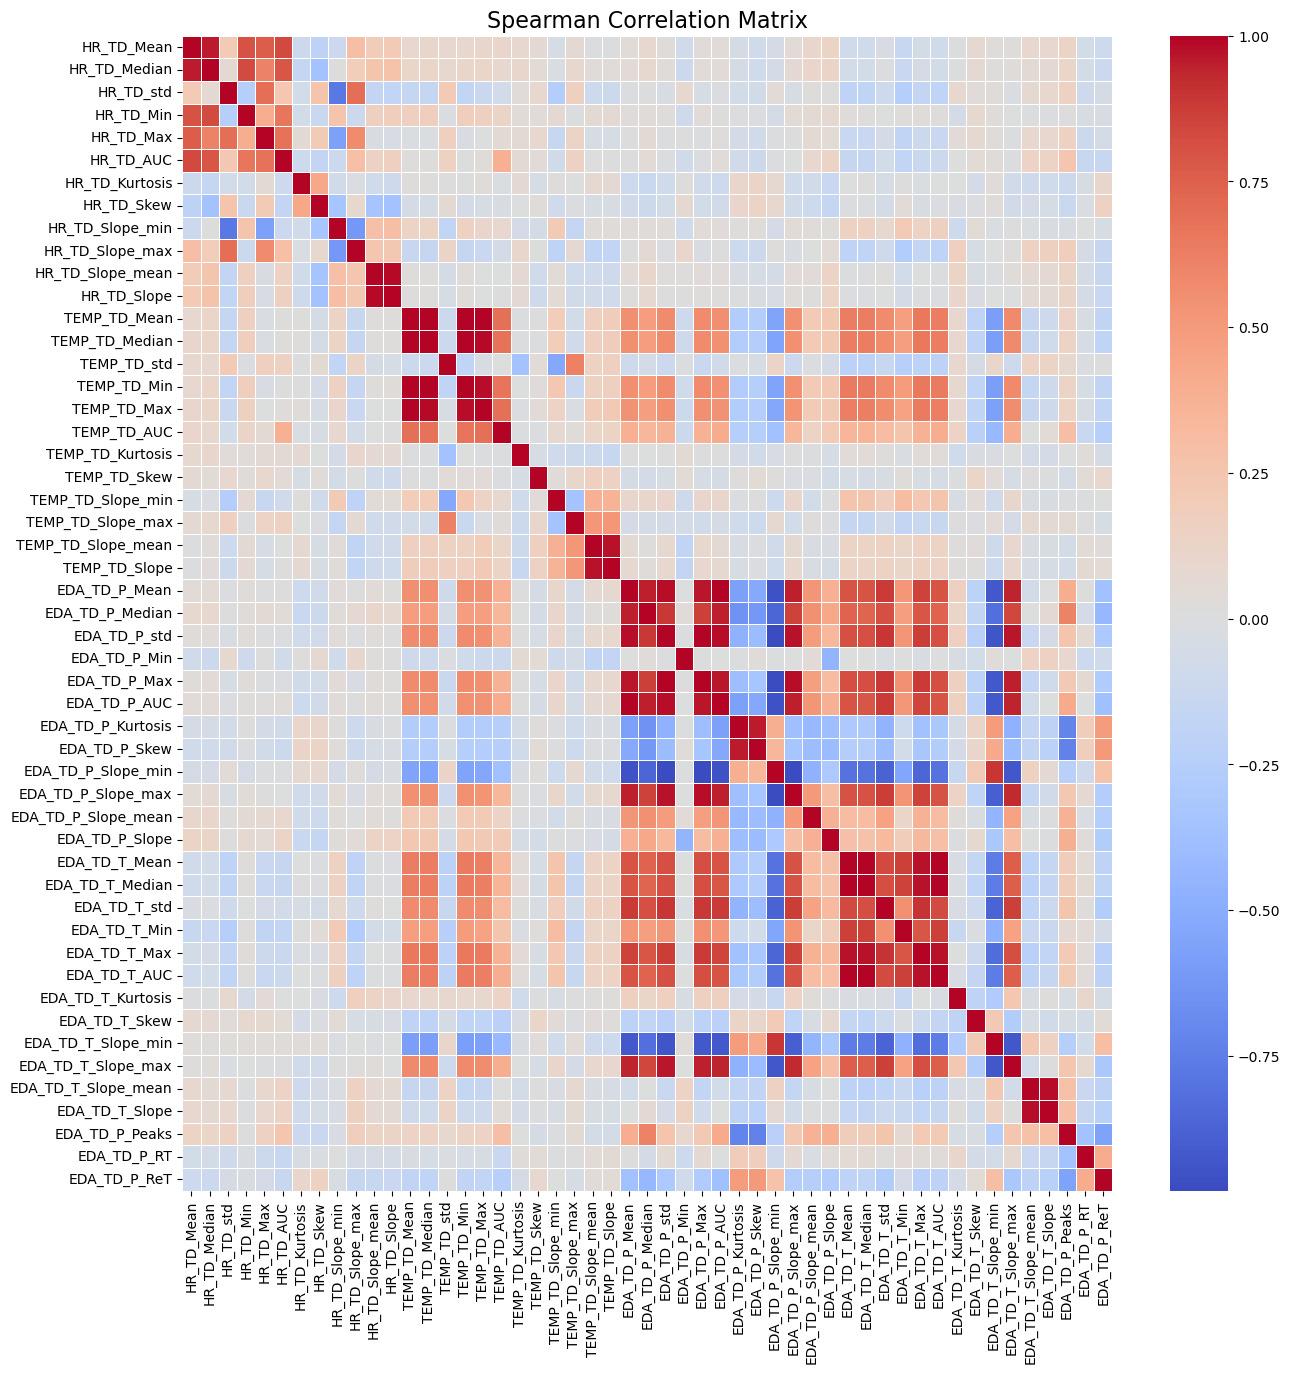

In [38]:
spearman_corr = df_metrics.corr(method='spearman')

plt.figure(figsize=(15, 15))
sns.heatmap(spearman_corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Matrix", fontsize=16)
plt.show()

In [39]:
other_columns = ["Individual", "Round", "Phase", "Puzzler", "Cohort",
                 "frustrated", "upset", "hostile", "alert", "ashamed",
                 "inspired", "nervous", "attentive", "afraid", "active", "determined"]

# Extract the selected columns
df_other = df_[other_columns]

# Concatenate along columns (axis=1)
df_standartized = pd.concat([df_other, df_metrics], axis=1)
df_standartized

,Individual,Round,Phase,Puzzler,Cohort,frustrated,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,HR_TD_Slope_mean,HR_TD_Slope,TEMP_TD_Mean,TEMP_TD_Median,TEMP_TD_std,TEMP_TD_Min,TEMP_TD_Max,TEMP_TD_AUC,TEMP_TD_Kurtosis,TEMP_TD_Skew,TEMP_TD_Slope_min,TEMP_TD_Slope_max,TEMP_TD_Slope_mean,TEMP_TD_Slope,EDA_TD_P_Mean,EDA_TD_P_Median,EDA_TD_P_std,EDA_TD_P_Min,EDA_TD_P_Max,EDA_TD_P_AUC,EDA_TD_P_Kurtosis,EDA_TD_P_Skew,EDA_TD_P_Slope_min,EDA_TD_P_Slope_max,EDA_TD_P_Slope_mean,EDA_TD_P_Slope,EDA_TD_T_Mean,EDA_TD_T_Median,EDA_TD_T_std,EDA_TD_T_Min,EDA_TD_T_Max,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT
0,1,round_3,phase3,1,D1_4,2.0,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0,0.010023,-0.062352,0.187214,-0.163880,0.001629,-0.312526,-0.621392,-0.007322,-0.414857,0.978121,1.134450,1.172477,-1.106824,-1.091118,0.588536,-1.281401,-1.102326,-0.987670,1.709965,-2.059884,-1.876924,-0.535081,-1.974748,-1.609427,-0.398763,-0.308917,-0.634936,0.209116,-0.719943,-0.401043,1.334549,-1.325052,0.730195,-0.756957,-0.376295,-0.284402,-0.675615,-0.666940,-0.698319,-0.539044,-0.749996,-0.674626,0.276417,-1.310763,0.595726,-0.667286,0.135978,0.096659,-1.012991,1.132105,0.099199
1,1,round_3,phase2,1,D1_4,3.0,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0,-0.176801,-0.069806,-0.793634,0.111690,-0.570809,-0.086288,-0.114281,-0.045281,0.532375,-0.699948,-0.286138,-0.196215,-1.199931,-1.200689,-0.262539,-1.148024,-1.187839,-0.472585,0.590538,1.380649,-0.328322,-0.141520,0.640777,0.686065,-0.398461,-0.308888,-0.634567,0.256411,-0.719546,-0.400723,0.488961,0.680362,0.728983,-0.753550,-0.372479,-0.290415,-0.677760,-0.669370,-0.699269,-0.540199,-0.751215,-0.674647,0.136077,0.945391,0.595677,-0.666593,0.135187,0.095006,-0.689332,0.466269,0.289742
2,1,round_3,phase1,1,D1_4,2.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,-0.033122,0.038688,-0.774299,0.369032,-0.544302,-0.988619,-0.336389,-0.740408,-0.158848,-0.343025,-0.210046,-0.232145,-1.323064,-1.310260,-0.323378,-1.281401,-1.358864,-2.055257,-0.493231,-0.211322,-0.201262,-0.068616,-0.369613,-0.622687,-0.398780,-0.308920,-0.635777,0.256411,-0.720610,-0.401076,2.035593,1.524777,0.732784,-0.758900,-0.374216,-0.289094,-0.678346,-0.669910,-0.700148,-0.540777,-0.752290,-0.680703,-0.072207,0.568117,0.596330,-0.667436,0.130645,0.091310,-1.093906,-0.056276,0.157854
3,1,round_2,phase3,1,D1_4,2.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,0.398059,0.532294,0.163883,0.068800,0.206917,0.153083,-0.486637,-0.513035,0.263566,0.280258,0.680722,0.685178,-1.463490,-1.590276,2.736107,-1.572404,-1.200055,-0.949563,-1.025771,0.777171,0.312484,2.485134,2.024604,2.211636,-0.398285,-0.308905,-0.633365,0.256411,-0.717967,-0.400570,0.538766,0.832617,0.729019,-0.755469,-0.371769,-0.288203,-0.679761,-0.671521,-0.697025,-0.543977,-0.751826,-0.677889,0.625703,1.341971,0.589771,-0.658566,0.129049,0.090101,-0.932077,-0.241620,-0.338459
4,1,round_2,phase2,1,D1_4,2.0,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0,-0.551609,-0.376240,-0.671610,-0.410499,-0.703343,-0.311621,0.152870,-1.139046,0.500374,-0.385643,-0.001954,0.021644,-1.568633,-1.553752,0.017369,-1.572404,-1.578754,-0.479703,-0.970688,-0.255459,-0.201262,-0.751237,-1.100251,-1.098459,-0.397816,-0.308850,-0.631438,0.241176,-0.714250,-0.400047,0.703698,0.863087,0.722779,-0.751029,-0.369585,-0.276574,-0.681440,-0.673405,-0.694939,-0.545233,-0.753021,-0.677829,0.230709,1.690908,0.590443,-0.662295,0.138101,0.098103,-0.284758,-0.401070,-0.142057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,26,round_4,phase2,1,D1_5,7.0,3.0,2.0,

### Grouping raw data by:

In [40]:
### Phase
df_metrics_grouped = df_.groupby("Phase")[df_metrics.columns].mean()
df_metrics_grouped

,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,HR_TD_Slope_mean,HR_TD_Slope,TEMP_TD_Mean,TEMP_TD_Median,TEMP_TD_std,TEMP_TD_Min,TEMP_TD_Max,TEMP_TD_AUC,TEMP_TD_Kurtosis,TEMP_TD_Skew,TEMP_TD_Slope_min,TEMP_TD_Slope_max,TEMP_TD_Slope_mean,TEMP_TD_Slope,EDA_TD_P_Mean,EDA_TD_P_Median,EDA_TD_P_std,EDA_TD_P_Min,EDA_TD_P_Max,EDA_TD_P_AUC,EDA_TD_P_Kurtosis,EDA_TD_P_Skew,EDA_TD_P_Slope_min,EDA_TD_P_Slope_max,EDA_TD_P_Slope_mean,EDA_TD_P_Slope,EDA_TD_T_Mean,EDA_TD_T_Median,EDA_TD_T_std,EDA_TD_T_Min,EDA_TD_T_Max,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT
Phase,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
phase1,78.546709,77.517308,7.116225,67.694038,94.098558,23842.325192,0.257866,0.367507,-0.670524,0.613486,-0.016208,-0.016975,32.850516,32.845817,0.116839,32.639615,33.082596,40134.742452,-0.443971,0.062594,-0.000836,0.000990,0.000090,0.000093,0.291864,0.203223,0.302254,-0.045080,1.607864,353.411317,14.924516,3.305624,-0.039338,0.044252,0.000339,0.000251,3.542304,3.571551,0.529757,2.328175,4.491823,4323.398097,0.424226,-0.095934,-0.027097,0.022276,-0.000325,-0.000280,19.846154,2.105254,2.121922
phase2,79.821439,78.778462,6.588371,69.629327,92.868365,25490.858365,-0.415210,0.226248,-0.510774,0.516538,-0.002918,-0.003391,32.953082,32.955096,0.085387,32.774712,33.115769,42195.669471,-0.478960,-0.067310,-0.000658,0.000623,-0.000020,-0.000021,0.596686,0.497114,0.423987,-0.018579,2.295783,752.023293,8.367708,2.397390,-0.047111,0.064187,0.000841,0.000501,3.390180,3.350148,0.579333,2.096904,4.582657,4348.132841,0.300596,0.052906,-0.033267,0.029925,0.000128,0.000199,32.384615,1.829868,1.765578
phase3,77.281774,76.062837,5.932446,69.011731,90.386442,23589.492212,-0.006640,0.534181,-0.522558,0.425410,-0.021238,-0.021607,32.912368,32.906442,0.123226,32.696538,33.145769,40294.852308,-0.397792,-0.009483,-0.000914,0.000892,0.000024,0.000028,0.365332,0.246751,0.370936,-0.036932,2.028741,442.830192,14.705649,3.235362,-0.045800,0.061058,0.000402,0.000252,4.362656,4.396658,0.593950,2.991209,5.400900,5260.569760,0.601089,-0.202467,-0.033378,0.027044,-0.000434,-0.000353,18.326923,2.060781,2.155321


In [41]:
### Individual
df_metrics_grouped = df_.groupby("Individual")[df_metrics.columns].mean()
df_metrics_grouped

,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,HR_TD_Slope_mean,HR_TD_Slope,TEMP_TD_Mean,TEMP_TD_Median,TEMP_TD_std,TEMP_TD_Min,TEMP_TD_Max,TEMP_TD_AUC,TEMP_TD_Kurtosis,TEMP_TD_Skew,TEMP_TD_Slope_min,TEMP_TD_Slope_max,TEMP_TD_Slope_mean,TEMP_TD_Slope,EDA_TD_P_Mean,EDA_TD_P_Median,EDA_TD_P_std,EDA_TD_P_Min,EDA_TD_P_Max,EDA_TD_P_AUC,EDA_TD_P_Kurtosis,EDA_TD_P_Skew,EDA_TD_P_Slope_min,EDA_TD_P_Slope_max,EDA_TD_P_Slope_mean,EDA_TD_P_Slope,EDA_TD_T_Mean,EDA_TD_T_Median,EDA_TD_T_std,EDA_TD_T_Min,EDA_TD_T_Max,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT
Individual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,76.696679,75.893750,5.771420,67.680833,90.354167,23226.784583,-0.157723,0.309919,-0.624375,0.448056,-0.011654,-0.012556,30.566724,30.563333,0.156822,30.291667,30.866667,37151.152500,-0.220043,0.088771,-0.001332,0.001310,0.000070,0.000072,0.002588,0.000402,0.004926,-0.001457,0.033187,3.197540,24.035568,3.705238,-0.000658,0.000839,-0.000005,0.000001,0.187191,0.189477,0.028016,0.151827,0.236054,227.813940,0.897618,0.382072,-0.000622,0.000864,0.000028,0.000030,13.750000,2.167416,2.295178
2,71.546322,68.141250,8.125456,62.904167,89.885833,21751.506667,0.129618,0.654914,-0.689792,0.561042,-0.040698,-0.040542,33.173332,33.179167,0.057478,33.051667,33.276667,40397.442083,-0.804603,-0.228737,-0.000447,0.000285,-0.000131,-0.000122,0.117649,0.063189,0.142705,-0.001074,0.756691,146.307325,8.489100,2.592304,-0.016847,0.021382,0.000279,0.000172,2.084478,2.049636,0.370201,1.361213,2.775825,2552.434768,-0.254043,-0.149129,-0.014894,0.014231,-0.000284,-0.000270,28.250000,1.946561,2.023297
3,89.641756,88.638750,9.987873,74.704167,111.182500,27129.880417,-0.107088,0.455958,-0.724292,0.661042,-0.006320,-0.006743,32.587343,32.564167,0.173421,32.286667,32.976667,39579.817917,0.279590,0.255850,-0.002169,0.001796,-0.000194,-0.000147,0.061810,0.032581,0.079427,-0.005535,0.481461,76.191679,9.882046,2.735058,-0.013141,0.019445,0.000087,0.000004,0.949823,0.923750,0.181468,0.672974,1.321996,1161.236158,-0.640089,0.239270,-0.004437,0.005655,-0.000134,-0.000126,28.833333,1.941031,2.025268
4,77.894272,78.542083,3.798799,71.430000,86.207500,23631.181667,0.348194,0.171948,-0.420000,0.366819,-0.014357,-0.014921,32.838192,32.837500,0.060280,32.720833,32.954167,39936.491667,-0.500301,-0.071554,-0.000250,0.000504,0.000085,0.000082,0.285987,0.173091,0.311095,-0.004837,1.781671,357.052721,8.763389,2.575139,-0.036704,0.054034,0.000600,0.000380,3.622235,3.563279,0.727224,2.527076,4.970218,4409.391146,-0.991474,0.286486,-0.019697,0.019141,-0.000071,-0.000030,26.916667,1.720628,1.849173
5,73.949241,71.953333,7.740609,64.603333,93.555000,22923.437500,-0.120341,0.515015,-0.684792,0.443750,-0.025002,-0.023504,32.751615,32.762500,0.103099,32.525000,32.954167,40680.023750,-0.206911,-0.147673,-0.000885,0.001065,0.000079,0.000066,0.383360,0.193626,0.512638,-0.013685,3.455214,475.873900,12.937807,3.057413,-0.096662,0.113833,0.000536,0.000552,7.287049,7.264202,0.631722,6.111045,8.565105,9057.640666,-0.467860,-0.019519,-0.026310,0.023779,-0.000070,0.000003,22.416667,2.227765,2.007675
6,89.852387,91.428750,4.550614,80.099167,95.004167,27825.547917,-0.476394,-0.350512,-0.358750,0.347708,-0.010735,-0.011048,34.603740,34.603750,0.034421,34.532500,34.683333,42966.569583,-0.273702,0.126337,-0.000144,0.000278,0.000062,0.000065,0.143095,0.049326,0.254087,-0.032231,1.759425,179.388502,18.063714,3.771003,-0.049156,0.067500,0.000372,0.000225,5.568138,5.505434,0.585980,4.591610,6.963063,6937.666212,-0.004714,0.407664,-0.015032,0.019555,-0.000415,-0.000377,16.083333,2.127348,2.279880
7,75.118129,74.868333,3.407403,69.436667,81.817500,24551.031667,-0.484442,0.190062,-0.335208,0.314500,-0.012808,-0.013016,33.725945,33.750000,0.193161,33.370833,34.034167,44184.716250,-0.911962,-0.055418,-0.001230,0.001450,

In [42]:
### Round
df_metrics_grouped = df_.groupby("Round")[df_metrics.columns].mean()
df_metrics_grouped

,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,HR_TD_Slope_max,HR_TD_Slope_mean,HR_TD_Slope,TEMP_TD_Mean,TEMP_TD_Median,TEMP_TD_std,TEMP_TD_Min,TEMP_TD_Max,TEMP_TD_AUC,TEMP_TD_Kurtosis,TEMP_TD_Skew,TEMP_TD_Slope_min,TEMP_TD_Slope_max,TEMP_TD_Slope_mean,TEMP_TD_Slope,EDA_TD_P_Mean,EDA_TD_P_Median,EDA_TD_P_std,EDA_TD_P_Min,EDA_TD_P_Max,EDA_TD_P_AUC,EDA_TD_P_Kurtosis,EDA_TD_P_Skew,EDA_TD_P_Slope_min,EDA_TD_P_Slope_max,EDA_TD_P_Slope_mean,EDA_TD_P_Slope,EDA_TD_T_Mean,EDA_TD_T_Median,EDA_TD_T_std,EDA_TD_T_Min,EDA_TD_T_Max,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT
Round,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
round_1,80.169421,79.111026,6.712082,70.184359,94.383462,26108.547115,-0.280813,0.291331,-0.555566,0.562489,-0.010699,-0.011644,32.720384,32.721538,0.121854,32.494487,32.942949,42806.104551,-0.527169,-0.095802,-0.000784,0.000971,0.000063,0.000063,0.507696,0.359799,0.473781,-0.029144,2.375555,644.746787,9.193078,2.570902,-0.051192,0.065079,0.000762,0.000486,5.560850,5.602685,0.728987,4.030580,6.854622,7009.533464,0.140195,-0.168778,-0.033914,0.030014,0.000131,0.000196,27.576923,1.943002,1.994645
round_2,78.894601,77.653974,6.858011,68.727564,93.780897,24369.572051,0.120817,0.352088,-0.600295,0.515797,-0.015741,-0.015365,32.942357,32.935641,0.119411,32.725256,33.172051,40827.192179,-0.526751,0.015055,-0.000801,0.000955,0.000065,0.000071,0.358841,0.257774,0.353111,-0.027922,2.010335,436.911569,13.725213,3.200223,-0.041586,0.058314,0.000498,0.000280,3.869079,3.847343,0.585028,2.489535,4.924119,4731.505683,0.491799,0.021799,-0.031346,0.025771,-0.000410,-0.000349,22.705128,2.026891,2.031513
round_3,78.978005,77.941603,6.421018,69.279487,92.465641,23744.118974,0.032706,0.484833,-0.544923,0.466333,-0.015797,-0.016056,33.010097,33.008718,0.100009,32.818077,33.205128,39854.560192,-0.249546,0.054830,-0.000839,0.000768,0.000022,0.000024,0.360143,0.289030,0.280875,-0.039515,1.619589,440.975981,14.704952,3.187694,-0.038458,0.049973,0.000477,0.000346,2.340984,2.321567,0.399860,1.428320,3.223923,2842.730964,0.175013,-0.021749,-0.027136,0.021884,-0.000343,-0.000282,21.448718,2.027492,2.095725
round_4,76.157869,75.104872,6.191611,66.922051,89.174487,23007.996218,-0.091356,0.375662,-0.571024,0.529293,-0.011581,-0.012899,32.948448,32.943910,0.092662,32.776667,33.138718,40012.495385,-0.457498,0.006987,-0.000786,0.000647,-0.000025,-0.000025,0.445164,0.356181,0.355135,-0.037541,1.904371,541.718734,13.040588,2.959015,-0.045095,0.052630,0.000373,0.000226,3.289274,3.319547,0.556846,1.939950,4.297843,3992.364153,0.960874,-0.158599,-0.032594,0.027992,-0.000218,-0.000142,22.346154,1.995749,1.932789


In [43]:
emotion_cols = ["frustrated", "upset", "hostile", "alert", "ashamed",
                "inspired", "nervous", "attentive", "afraid", "active", "determined"]

emotion_medians_by_phase = df_standartized.groupby("Phase")[emotion_cols].mean()
print(emotion_medians_by_phase)

        frustrated     upset   hostile     alert   ashamed  inspired   nervous  attentive    afraid    active  determined
Phase                                                                                                                    
phase1    1.076923  1.105769  1.028846  1.990385  1.096154  2.049020  1.451923   2.611650  1.077670  2.184466    2.796117
phase2    3.201923  1.663462  1.115385  2.701923  1.403846  2.461538  1.451923   3.355769  1.057692  3.278846    3.394231
phase3    1.788462  1.269231  1.028846  1.884615  1.163462  2.038462  1.240385   2.384615  1.019231  2.192308    2.543689


In [44]:
df_standartized.to_csv("../data/df_standartized.csv", index=False)